In [37]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import mols2grid
import rdkit.Chem.MolStandardize 
import openpyxl

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem, Descriptors
from rdkit import DataStructs
#import molplotly


#import plotly.express as px
#import plotly.io as pio
#pio.renderers
#pio.renderers.default = "notebook_connected"

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# All antibiotics from papers

In [39]:
df = pd.read_csv('mixed_data(to_work)_for docking.csv', sep = ',')

<Axes: xlabel='Charge', ylabel='Permeability coefficient'>

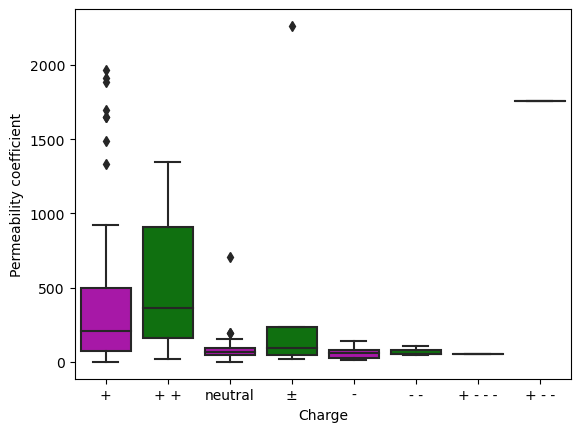

In [40]:
sns.boxplot(x='Charge', y='Permeability coefficient', palette=["m", "g"], data=df)

#### FINAL - dataframe with all poses
#### FINAL_pose1 - Taking a pose based on interaction fingerprints (based on the majority)
#### FINAL_pose2 - Taking the low energy pose for each lingand
#### FINAL_pose3 dataframe - Voting based on at least ONE interaction existence

In [41]:
FINAL_pose1 = pd.read_csv('FINAL_pose1.csv', sep = ',')
FINAL_pose2 = pd.read_csv('FINAL_pose2.csv', sep = ',')
FINAL_pose3 = pd.read_csv('FINAL_pose3.csv', sep = ',')
FINAL = pd.read_csv('FINAL.csv', sep = ',')

In [42]:
important_residues = ['A:113(ASP)', 'A:117(GLU)', 'A:16(LYS)', 'A:42(ARG)', 'A:82(ARG)', 'A:132(ARG)']

# Relationship between Permeability coefficient and different methods to choose pose

In [43]:
def my_function(residue_name):

    fig, axes = plt.subplots(1,3, figsize = (12, 5))
    sns.swarmplot(x=residue_name, y='Permeability coefficient', palette='deep', data=FINAL_pose2, ax = axes[0])
    sns.swarmplot(x=residue_name, y='Permeability coefficient', palette='deep', data=FINAL_pose1, ax = axes[1])
    sns.swarmplot(x=residue_name, y='Permeability coefficient', palette='deep', data=FINAL_pose3, ax = axes[2])
    
    sns.boxplot(x=residue_name, y='Permeability coefficient', palette='winter', data=FINAL_pose2, ax = axes[0])
    sns.boxplot(x=residue_name, y='Permeability coefficient', palette='winter', data=FINAL_pose1, ax = axes[1])
    sns.boxplot(x=residue_name, y='Permeability coefficient', palette='winter', data=FINAL_pose3, ax = axes[2])
    
    axes[0].set_title('low energy pose')
    axes[1].set_title('interaction fingerprints (majority)')
    axes[2].set_title('interaction fingerprints (one)')
    
    axes[1].set_ylabel(' ')
    axes[2].set_ylabel(' ')

important_residues


['A:113(ASP)',
 'A:117(GLU)',
 'A:16(LYS)',
 'A:42(ARG)',
 'A:82(ARG)',
 'A:132(ARG)']

C:\Users\olshana1\AppData\Local\Temp\ipykernel_21604\3874775782.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=residue_name, y='Permeability coefficient', palette='deep', data=FINAL_pose2, ax = axes[0])
c:\Users\olshana1\AppData\Local\anaconda3\envs\my-rdkit-env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\olshana1\AppData\Local\Temp\ipykernel_21604\3874775782.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x=residue_name, y='Permeability coefficient', palette='deep', data=FINAL_pose1, ax = axes[1])
c:\Users\olshana1\AppData\Local\anaconda3\envs\my-rdkit-env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.wa

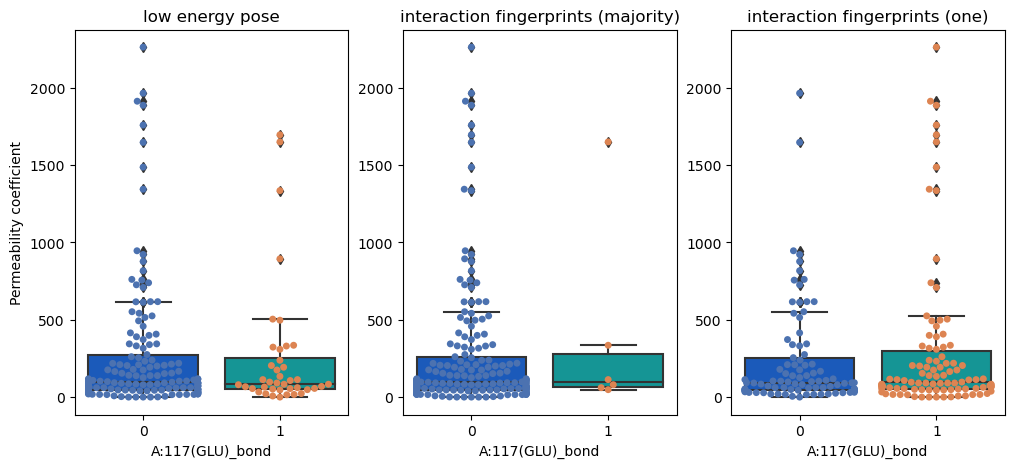

In [51]:
my_function(important_residues[1] + '_bond')

# PCA

In [45]:
from sklearn.decomposition import PCA

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'interaction fingerprints (one)')

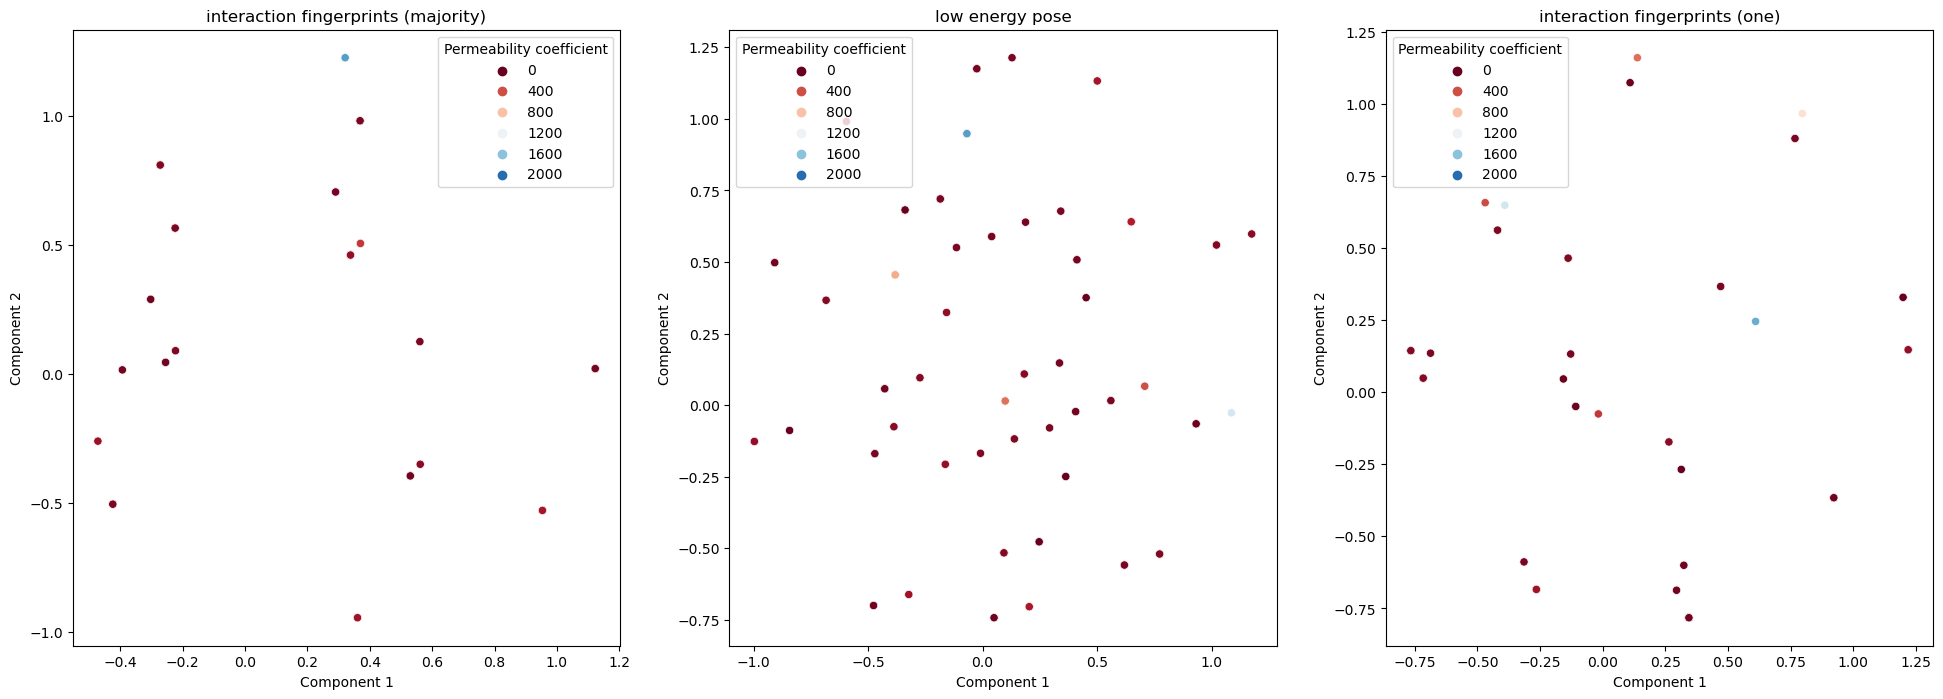

In [46]:
list_experiments = [FINAL_pose1, FINAL_pose2, FINAL_pose3]
columns_PCA = ['A:113(ASP)_bond', 'A:117(GLU)_bond', 'A:16(LYS)_bond',
'A:42(ARG)_bond', 'A:82(ARG)_bond', 'A:132(ARG)_bond']

fig, axes = plt.subplots(1,3, figsize = (24, 8))

n = 0
for experiment in list_experiments:
    pca = PCA(n_components=2)
    pca.fit(experiment[columns_PCA])
    x_pca = pca.transform(experiment[columns_PCA])
    print(type(x_pca))

    sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=experiment['Permeability coefficient'], palette = 'RdBu', ax = axes[n])
    #axes[n].set_title("PCA")
    axes[n].set_xlabel('Component 1')
    axes[n].set_ylabel('Component 2')
    
    n = n+1 

axes[0].set_title('interaction fingerprints (majority)')
axes[1].set_title('low energy pose')
axes[2].set_title('interaction fingerprints (one)')

In [47]:
pca = PCA(n_components=3)
pca.fit(FINAL_pose1[columns_PCA])
x_pca = pca.transform(FINAL_pose1[columns_PCA])

x_pca_dataframe = pd.concat([FINAL_pose1[['name', 'Permeability coefficient', 'Canonical SMILES']],  pd.DataFrame(x_pca) ], axis=1).reset_index(drop=True).rename(columns={0:'pca_1',1:'pca_2',2:'pca_3'})
#x_pca_dataframe.head()

scatter_tsnekmean_3d = px.scatter_3d(data_frame=x_pca_dataframe, x = 'pca_1', y = 'pca_2', z = 'pca_3', color='Permeability coefficient',
                                     template = "simple_white")
scatter_tsnekmean_3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))
scatter_tsnekmean_3d = molplotly.add_molecules(fig=scatter_tsnekmean_3d, df = x_pca_dataframe,
                                   smiles_col='Canonical SMILES',
                                   color_col = 'Permeability coefficient',
                                   title_col='name'
                                   )
scatter_tsnekmean_3d.run_server(mode='inline',port=8005)

NameError: name 'px' is not defined